# Introduction to Probability Distributions
## Discrete vs Continuous Distributions with Python

This notebook provides a comprehensive introduction to probability distributions, covering both **discrete** and **continuous** types with visual examples, mathematical properties, and practical applications.

### Learning Objectives:
- 🎯 Understand the difference between discrete and continuous distributions
- 📊 Learn key properties: PDF, PMF, CDF, mean, variance
- 🔍 Explore common distributions with real-world examples
- 💻 Master Python tools for working with distributions
- 🎲 Apply distributions to solve practical problems

### What We'll Cover:

**Discrete Distributions:**
- Uniform Discrete
- Binomial
- Poisson
- Geometric
- Hypergeometric

**Continuous Distributions:**
- Uniform Continuous
- Normal (Gaussian)
- Exponential
- Gamma
- Beta
- Log-Normal

## 1. Setup and Imports

Let's start by importing all the necessary libraries for working with probability distributions.

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

# Set random seed for reproducibility
np.random.seed(42)

print("📚 Libraries loaded successfully!")
print("🎲 Ready to explore probability distributions!")
print(f"📊 NumPy version: {np.__version__}")
print(f"📈 Scipy version: {stats.__version__ if hasattr(stats, '__version__') else 'Latest'}")

📚 Libraries loaded successfully!
🎲 Ready to explore probability distributions!
📊 NumPy version: 2.3.2
📈 Scipy version: Latest


## 2. Discrete vs Continuous: The Fundamental Difference

Understanding the distinction between discrete and continuous distributions is crucial for choosing the right model for your data.

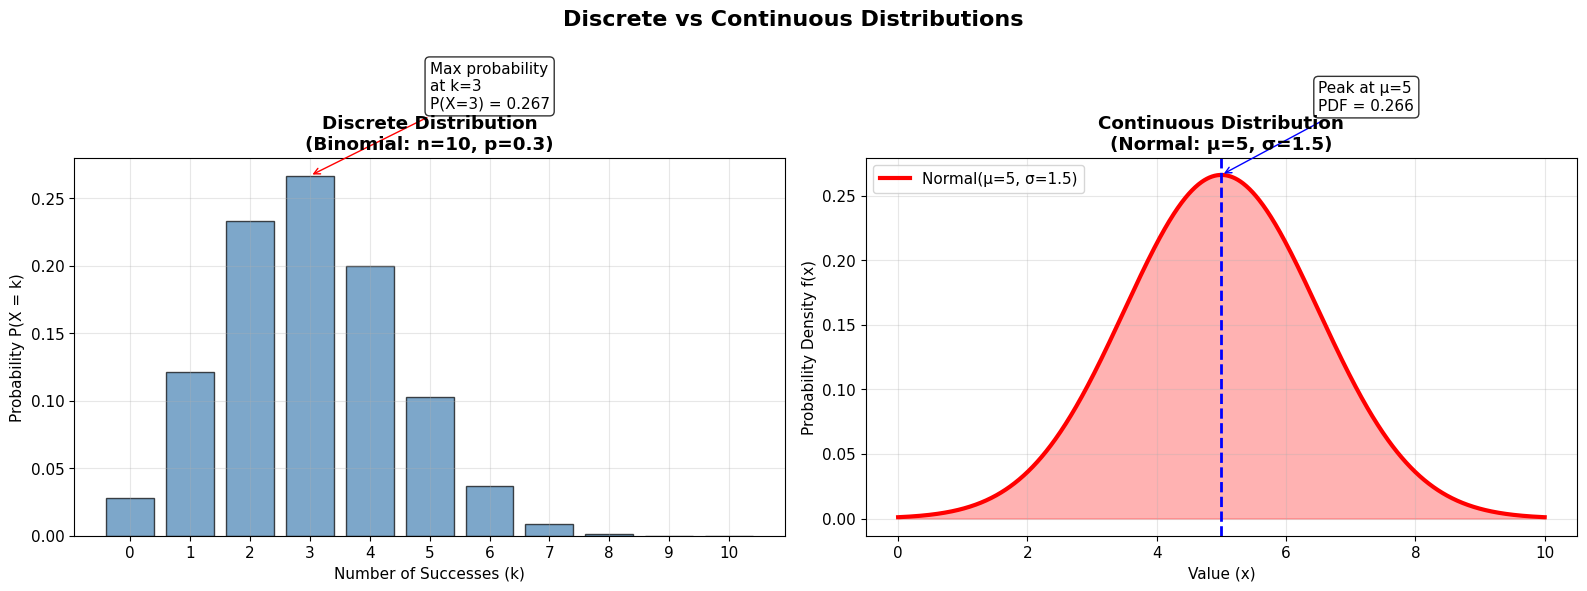

🔍 KEY DIFFERENCES:

📊 DISCRETE DISTRIBUTIONS:
   • Random variable takes specific, countable values
   • Probability Mass Function (PMF): P(X = k)
   • Examples: Number of heads in coin flips, defective items, customers
   • Visualized with bar charts

📈 CONTINUOUS DISTRIBUTIONS:
   • Random variable can take any value in a range
   • Probability Density Function (PDF): f(x)
   • P(X = exact value) = 0, we calculate P(a < X < b)
   • Examples: Height, weight, temperature, time
   • Visualized with smooth curves

🎯 BOTH TYPES HAVE:
   • Cumulative Distribution Function (CDF): P(X ≤ x)
   • Mean (Expected Value): E[X]
   • Variance: Var(X) = E[(X - μ)²]
   • Standard Deviation: σ = √Var(X)


In [2]:
# Create a visual comparison of discrete vs continuous distributions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Discrete vs Continuous Distributions', fontsize=16, fontweight='bold')

# Discrete Distribution Example: Binomial
n, p = 10, 0.3
x_discrete = np.arange(0, n+1)
y_discrete = stats.binom.pmf(x_discrete, n, p)

axes[0].bar(x_discrete, y_discrete, alpha=0.7, color='steelblue', edgecolor='black')
axes[0].set_title('Discrete Distribution\n(Binomial: n=10, p=0.3)', fontweight='bold')
axes[0].set_xlabel('Number of Successes (k)')
axes[0].set_ylabel('Probability P(X = k)')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(x_discrete)

# Add annotations
max_prob_idx = np.argmax(y_discrete)
axes[0].annotate(f'Max probability\nat k={max_prob_idx}\nP(X={max_prob_idx}) = {y_discrete[max_prob_idx]:.3f}',
                xy=(max_prob_idx, y_discrete[max_prob_idx]), 
                xytext=(max_prob_idx+2, y_discrete[max_prob_idx]+0.05),
                arrowprops=dict(arrowstyle='->', color='red'),
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Continuous Distribution Example: Normal
mu, sigma = 5, 1.5
x_continuous = np.linspace(0, 10, 1000)
y_continuous = stats.norm.pdf(x_continuous, mu, sigma)

axes[1].plot(x_continuous, y_continuous, 'r-', linewidth=3, label=f'Normal(μ={mu}, σ={sigma})')
axes[1].fill_between(x_continuous, y_continuous, alpha=0.3, color='red')
axes[1].set_title('Continuous Distribution\n(Normal: μ=5, σ=1.5)', fontweight='bold')
axes[1].set_xlabel('Value (x)')
axes[1].set_ylabel('Probability Density f(x)')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Add vertical line at mean
axes[1].axvline(mu, color='blue', linestyle='--', linewidth=2, label=f'Mean = {mu}')
axes[1].annotate(f'Peak at μ={mu}\nPDF = {stats.norm.pdf(mu, mu, sigma):.3f}',
                xy=(mu, stats.norm.pdf(mu, mu, sigma)), 
                xytext=(mu+1.5, stats.norm.pdf(mu, mu, sigma)+0.05),
                arrowprops=dict(arrowstyle='->', color='blue'),
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("🔍 KEY DIFFERENCES:")
print("\n📊 DISCRETE DISTRIBUTIONS:")
print("   • Random variable takes specific, countable values")
print("   • Probability Mass Function (PMF): P(X = k)")
print("   • Examples: Number of heads in coin flips, defective items, customers")
print("   • Visualized with bar charts")

print("\n📈 CONTINUOUS DISTRIBUTIONS:")
print("   • Random variable can take any value in a range")
print("   • Probability Density Function (PDF): f(x)")
print("   • P(X = exact value) = 0, we calculate P(a < X < b)")
print("   • Examples: Height, weight, temperature, time")
print("   • Visualized with smooth curves")

print("\n🎯 BOTH TYPES HAVE:")
print("   • Cumulative Distribution Function (CDF): P(X ≤ x)")
print("   • Mean (Expected Value): E[X]")
print("   • Variance: Var(X) = E[(X - μ)²]")
print("   • Standard Deviation: σ = √Var(X)")

## 3. Normal Distribution Deep Dive

The **normal distribution** is the most important continuous distribution, appearing naturally in many phenomena due to the Central Limit Theorem.

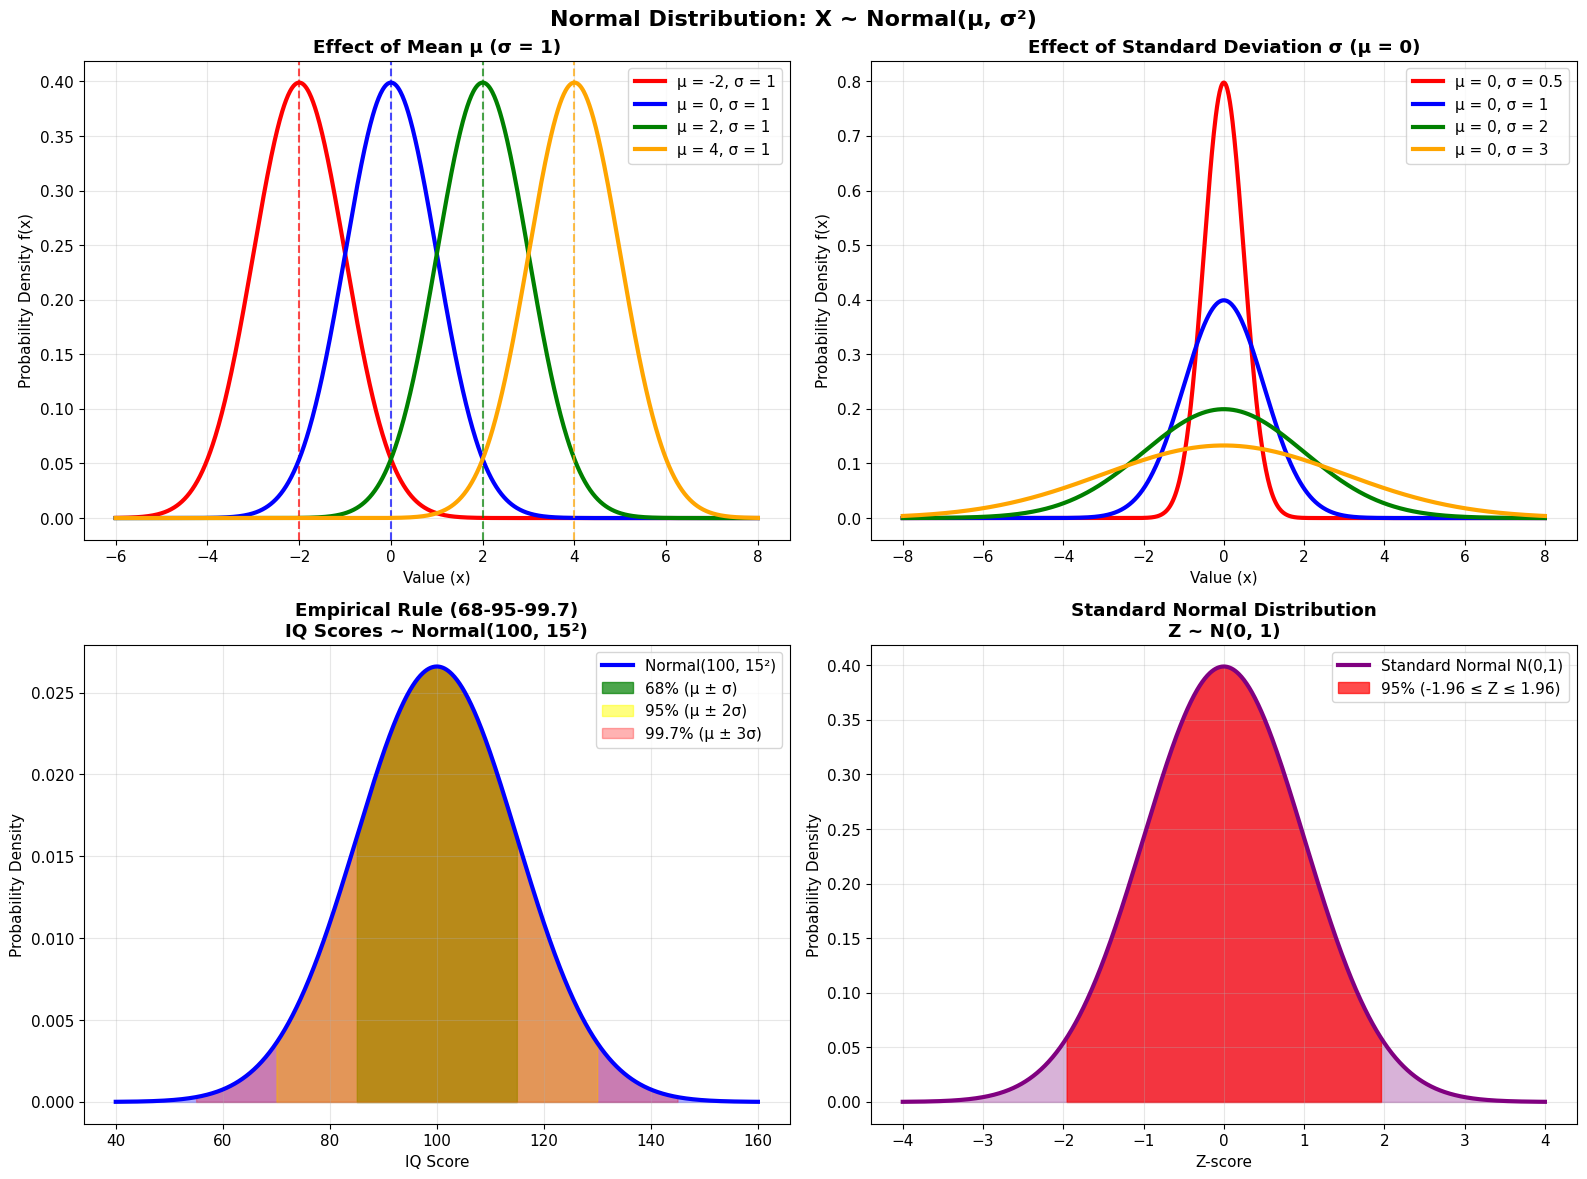

🔔 NORMAL DISTRIBUTION PROPERTIES:

🌟 REAL-WORLD APPLICATIONS:
   👥 Human Characteristics: Height, weight, IQ scores
   📏 Measurement Errors: Instrument precision, rounding
   📊 Test Scores: SAT, GRE, standardized tests
   💹 Finance: Stock returns, risk modeling
   🏭 Quality Control: Product specifications, tolerances

💡 KEY INSIGHTS:
   • Most important distribution in statistics
   • Foundation of many statistical tests
   • Central Limit Theorem guarantees normality
   • Linear combinations of normals are also normal


In [3]:
# Normal Distribution Comprehensive Example
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Normal Distribution: X ~ Normal(μ, σ²)', fontsize=16, fontweight='bold')

# Example 1: Effect of mean (μ)
sigma = 1
mu_values = [-2, 0, 2, 4]
colors = ['red', 'blue', 'green', 'orange']
x = np.linspace(-6, 8, 1000)

for mu, color in zip(mu_values, colors):
    y = stats.norm.pdf(x, mu, sigma)
    axes[0,0].plot(x, y, color=color, linewidth=3, label=f'μ = {mu}, σ = {sigma}')
    axes[0,0].axvline(mu, color=color, linestyle='--', alpha=0.7)

axes[0,0].set_title('Effect of Mean μ (σ = 1)', fontweight='bold')
axes[0,0].set_xlabel('Value (x)')
axes[0,0].set_ylabel('Probability Density f(x)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Example 2: Effect of standard deviation (σ)
mu = 0
sigma_values = [0.5, 1, 2, 3]
colors = ['red', 'blue', 'green', 'orange']
x = np.linspace(-8, 8, 1000)

for sigma, color in zip(sigma_values, colors):
    y = stats.norm.pdf(x, mu, sigma)
    axes[0,1].plot(x, y, color=color, linewidth=3, label=f'μ = {mu}, σ = {sigma}')

axes[0,1].set_title('Effect of Standard Deviation σ (μ = 0)', fontweight='bold')
axes[0,1].set_xlabel('Value (x)')
axes[0,1].set_ylabel('Probability Density f(x)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Example 3: Empirical Rule (68-95-99.7 Rule)
mu, sigma = 100, 15  # IQ scores
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

axes[1,0].plot(x, y, 'blue', linewidth=3, label='Normal(100, 15²)')
axes[1,0].fill_between(x, y, alpha=0.3, color='blue')

# 68% (1 standard deviation)
x1 = x[(x >= mu - sigma) & (x <= mu + sigma)]
y1 = stats.norm.pdf(x1, mu, sigma)
axes[1,0].fill_between(x1, y1, alpha=0.7, color='green', label='68% (μ ± σ)')

# 95% (2 standard deviations)
x2 = x[(x >= mu - 2*sigma) & (x <= mu + 2*sigma)]
y2 = stats.norm.pdf(x2, mu, sigma)
axes[1,0].fill_between(x2, y2, alpha=0.5, color='yellow', label='95% (μ ± 2σ)')

# 99.7% (3 standard deviations)
x3 = x[(x >= mu - 3*sigma) & (x <= mu + 3*sigma)]
y3 = stats.norm.pdf(x3, mu, sigma)
axes[1,0].fill_between(x3, y3, alpha=0.3, color='red', label='99.7% (μ ± 3σ)')

axes[1,0].set_title('Empirical Rule (68-95-99.7)\nIQ Scores ~ Normal(100, 15²)', fontweight='bold')
axes[1,0].set_xlabel('IQ Score')
axes[1,0].set_ylabel('Probability Density')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Example 4: Standard Normal and Z-scores
x_std = np.linspace(-4, 4, 1000)
y_std = stats.norm.pdf(x_std, 0, 1)

axes[1,1].plot(x_std, y_std, 'purple', linewidth=3, label='Standard Normal N(0,1)')
axes[1,1].fill_between(x_std, y_std, alpha=0.3, color='purple')

# Highlight specific z-score areas
z_scores = [-1.96, 1.96]  # 95% confidence interval
x_z = x_std[(x_std >= z_scores[0]) & (x_std <= z_scores[1])]
y_z = stats.norm.pdf(x_z, 0, 1)
axes[1,1].fill_between(x_z, y_z, alpha=0.7, color='red', 
                       label='95% (-1.96 ≤ Z ≤ 1.96)')

axes[1,1].set_title('Standard Normal Distribution\nZ ~ N(0, 1)', fontweight='bold')
axes[1,1].set_xlabel('Z-score')
axes[1,1].set_ylabel('Probability Density')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🔔 NORMAL DISTRIBUTION PROPERTIES:")
print("\n🌟 REAL-WORLD APPLICATIONS:")
print("   👥 Human Characteristics: Height, weight, IQ scores")
print("   📏 Measurement Errors: Instrument precision, rounding")
print("   📊 Test Scores: SAT, GRE, standardized tests")
print("   💹 Finance: Stock returns, risk modeling")
print("   🏭 Quality Control: Product specifications, tolerances")
print("\n💡 KEY INSIGHTS:")
print("   • Most important distribution in statistics")
print("   • Foundation of many statistical tests")
print("   • Central Limit Theorem guarantees normality")
print("   • Linear combinations of normals are also normal")

## 4. Exponential Distribution

The **exponential distribution** models the time between events in a Poisson process, or the lifetime of systems with constant failure rate.

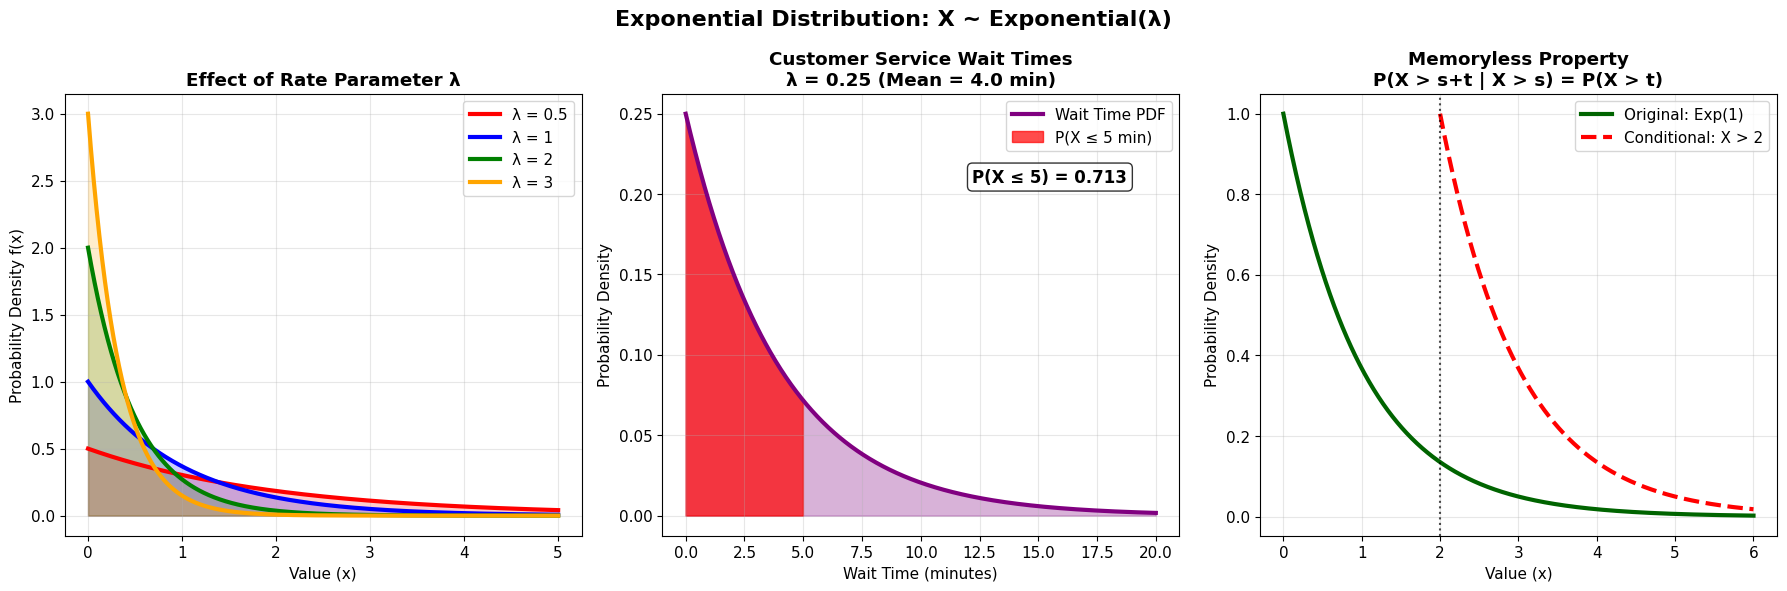

⏰ EXPONENTIAL DISTRIBUTION WITH SCIPY:

📊 Exponential(λ=0.5) Statistics:
   Mean: 2.00
   Variance: 4.00
   Standard Deviation: 2.00
   Note: Mean = Std Dev = 1/λ for exponential

📈 Key Probabilities:
   P(X ≤ 2) = 0.6321
   P(X > 3) = 0.2231
   P(1 ≤ X ≤ 4) = 0.4712
   P(X > mean) = P(X > 2.0) = 0.3679 ≈ 0.368

🌟 REAL-WORLD APPLICATIONS:
   ⏰ Wait Times: Time between customer arrivals
   📞 Call Centers: Time between phone calls
   💡 Reliability: Component lifetimes, failure times
   🌐 Internet: Time between packet arrivals
   ☢️ Physics: Radioactive decay, particle interactions

📐 MATHEMATICAL PROPERTIES:
   • X ~ Exponential(λ) where λ > 0
   • Mean: μ = 1/λ = 2.0
   • Variance: σ² = 1/λ² = 4.0
   • PDF: f(x) = λe^(-λx) for x ≥ 0
   • CDF: F(x) = 1 - e^(-λx) for x ≥ 0
   • Memoryless: P(X > s+t | X > s) = P(X > t)


In [4]:
# Exponential Distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Exponential Distribution: X ~ Exponential(λ)', fontsize=16, fontweight='bold')

# Example 1: Effect of rate parameter λ
lambda_values = [0.5, 1, 2, 3]
colors = ['red', 'blue', 'green', 'orange']
x = np.linspace(0, 5, 1000)

for lam, color in zip(lambda_values, colors):
    y = stats.expon.pdf(x, scale=1/lam)  # scipy uses scale = 1/λ
    axes[0].plot(x, y, color=color, linewidth=3, label=f'λ = {lam}')
    axes[0].fill_between(x, y, alpha=0.2, color=color)

axes[0].set_title('Effect of Rate Parameter λ', fontweight='bold')
axes[0].set_xlabel('Value (x)')
axes[0].set_ylabel('Probability Density f(x)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Example 2: Customer service wait times
lambda_service = 0.25  # Average 4 minutes between customers (1/λ = 4)
x_service = np.linspace(0, 20, 1000)
y_service = stats.expon.pdf(x_service, scale=1/lambda_service)

axes[1].plot(x_service, y_service, 'purple', linewidth=3, label='Wait Time PDF')
axes[1].fill_between(x_service, y_service, alpha=0.3, color='purple')

# Highlight probability of waiting less than 5 minutes
x_highlight = x_service[x_service <= 5]
y_highlight = stats.expon.pdf(x_highlight, scale=1/lambda_service)
axes[1].fill_between(x_highlight, y_highlight, alpha=0.7, color='red', 
                     label='P(X ≤ 5 min)')

axes[1].set_title(f'Customer Service Wait Times\nλ = {lambda_service} (Mean = {1/lambda_service:.1f} min)', fontweight='bold')
axes[1].set_xlabel('Wait Time (minutes)')
axes[1].set_ylabel('Probability Density')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Calculate and display probability
prob_5min = stats.expon.cdf(5, scale=1/lambda_service)
axes[1].text(0.6, 0.8, f'P(X ≤ 5) = {prob_5min:.3f}', 
             transform=axes[1].transAxes, fontsize=12, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Example 3: Memoryless Property Demonstration
lambda_mem = 1
x_mem = np.linspace(0, 6, 1000)
y_mem = stats.expon.pdf(x_mem, scale=1/lambda_mem)

axes[2].plot(x_mem, y_mem, 'darkgreen', linewidth=3, label='Original: Exp(1)')

# Conditional distribution: X > 2
x_cond = x_mem[x_mem >= 2] - 2  # Shift by 2
y_cond = stats.expon.pdf(x_cond, scale=1/lambda_mem)
axes[2].plot(x_cond + 2, y_cond, 'red', linewidth=3, linestyle='--', 
             label='Conditional: X > 2')

axes[2].set_title('Memoryless Property\nP(X > s+t | X > s) = P(X > t)', fontweight='bold')
axes[2].set_xlabel('Value (x)')
axes[2].set_ylabel('Probability Density')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Add vertical line at x = 2
axes[2].axvline(2, color='black', linestyle=':', alpha=0.7, label='Conditioning point')

plt.tight_layout()
plt.show()

# Demonstrate with scipy.stats
print("⏰ EXPONENTIAL DISTRIBUTION WITH SCIPY:")

# Create exponential distribution
lam = 0.5  # λ = 0.5, so mean = 1/λ = 2
exp_dist = stats.expon(scale=1/lam)

print(f"\n📊 Exponential(λ={lam}) Statistics:")
print(f"   Mean: {exp_dist.mean():.2f}")
print(f"   Variance: {exp_dist.var():.2f}")
print(f"   Standard Deviation: {exp_dist.std():.2f}")
print(f"   Note: Mean = Std Dev = 1/λ for exponential")

# Calculate specific probabilities
print(f"\n📈 Key Probabilities:")
print(f"   P(X ≤ 2) = {exp_dist.cdf(2):.4f}")
print(f"   P(X > 3) = {1 - exp_dist.cdf(3):.4f}")
print(f"   P(1 ≤ X ≤ 4) = {exp_dist.cdf(4) - exp_dist.cdf(1):.4f}")
print(f"   P(X > mean) = P(X > {1/lam}) = {1 - exp_dist.cdf(1/lam):.4f} ≈ 0.368")

print("\n🌟 REAL-WORLD APPLICATIONS:")
print("   ⏰ Wait Times: Time between customer arrivals")
print("   📞 Call Centers: Time between phone calls")
print("   💡 Reliability: Component lifetimes, failure times")
print("   🌐 Internet: Time between packet arrivals")
print("   ☢️ Physics: Radioactive decay, particle interactions")

print("\n📐 MATHEMATICAL PROPERTIES:")
print(f"   • X ~ Exponential(λ) where λ > 0")
print(f"   • Mean: μ = 1/λ = {1/lam:.1f}")
print(f"   • Variance: σ² = 1/λ² = {1/lam**2:.1f}")
print(f"   • PDF: f(x) = λe^(-λx) for x ≥ 0")
print(f"   • CDF: F(x) = 1 - e^(-λx) for x ≥ 0")
print(f"   • Memoryless: P(X > s+t | X > s) = P(X > t)")

## 5. Binomial Distribution

The **binomial distribution** models the number of successes in a fixed number of independent trials.

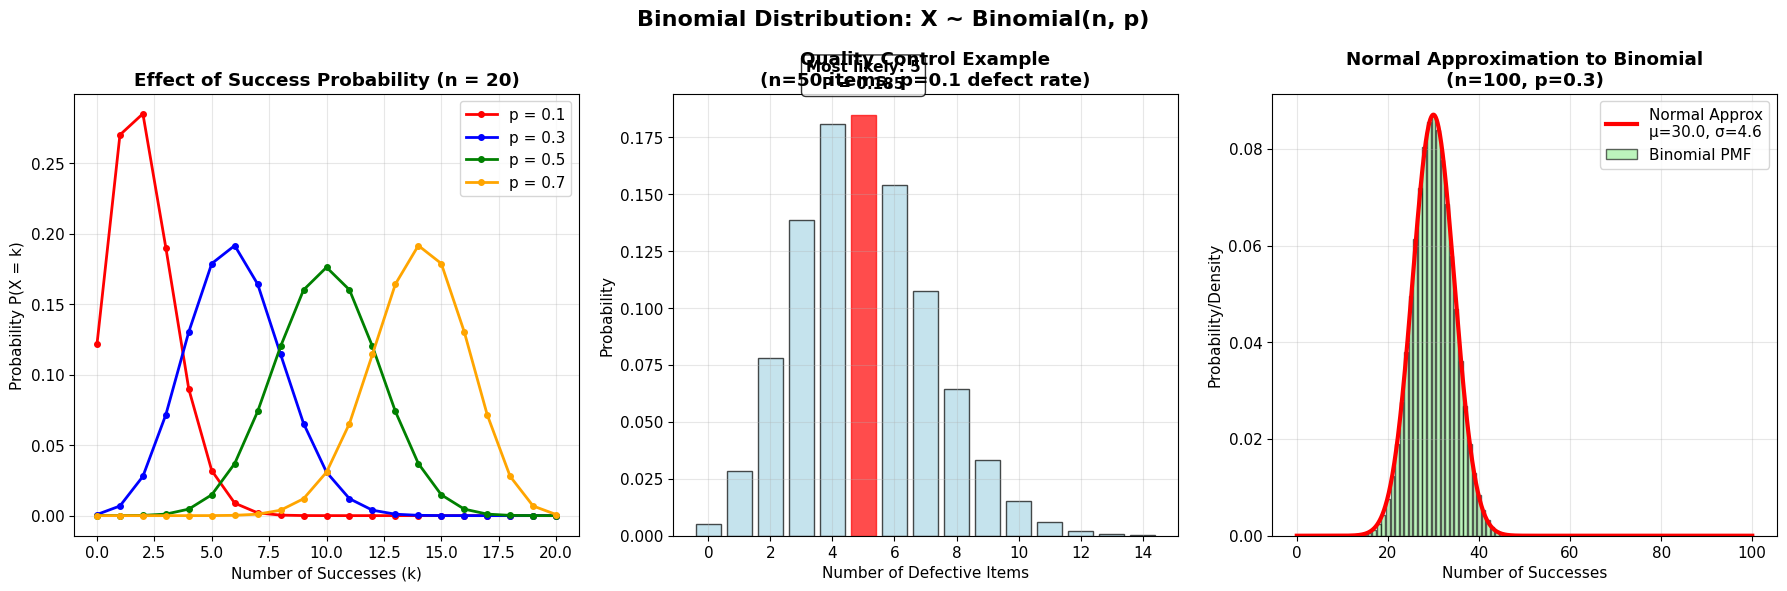

🎯 BINOMIAL DISTRIBUTION APPLICATIONS:
   🏭 Quality Control: Defective items in a batch
   📊 Marketing: Email open rates, conversion rates
   🏥 Medicine: Treatment success rates
   📈 Finance: Number of profitable trades
   🎯 Sports: Free throw makes, game wins


In [5]:
# Binomial Distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Binomial Distribution: X ~ Binomial(n, p)', fontsize=16, fontweight='bold')

# Example 1: Effect of p (probability) with fixed n
n = 20
p_values = [0.1, 0.3, 0.5, 0.7]
colors = ['red', 'blue', 'green', 'orange']

x = np.arange(0, n + 1)
for p, color in zip(p_values, colors):
    y = stats.binom.pmf(x, n, p)
    axes[0].plot(x, y, 'o-', color=color, linewidth=2, markersize=4, label=f'p = {p}')

axes[0].set_title(f'Effect of Success Probability (n = {n})', fontweight='bold')
axes[0].set_xlabel('Number of Successes (k)')
axes[0].set_ylabel('Probability P(X = k)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Example 2: Quality Control
n_inspect = 50  # Inspect 50 items
p_defect = 0.1  # 10% defect rate

x_qc = np.arange(0, 15)  # Focus on 0-14 defects
y_qc = stats.binom.pmf(x_qc, n_inspect, p_defect)

bars = axes[1].bar(x_qc, y_qc, alpha=0.7, color='lightblue', edgecolor='black')
axes[1].set_title('Quality Control Example\n(n=50 items, p=0.1 defect rate)', fontweight='bold')
axes[1].set_xlabel('Number of Defective Items')
axes[1].set_ylabel('Probability')
axes[1].grid(True, alpha=0.3)

# Highlight most likely outcome
max_idx = np.argmax(y_qc)
bars[max_idx].set_color('red')
axes[1].text(max_idx, y_qc[max_idx] + 0.01, 
             f'Most likely: {max_idx}\nP = {y_qc[max_idx]:.3f}', 
             ha='center', va='bottom', fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Example 3: Normal approximation to binomial
n_large = 100
p_normal = 0.3
x_large = np.arange(0, n_large + 1)
y_binom = stats.binom.pmf(x_large, n_large, p_normal)

# Plot binomial
axes[2].bar(x_large, y_binom, alpha=0.6, color='lightgreen', 
            edgecolor='black', label='Binomial PMF')

# Overlay normal approximation
mu_approx = n_large * p_normal
sigma_approx = np.sqrt(n_large * p_normal * (1 - p_normal))
x_norm = np.linspace(0, n_large, 1000)
y_norm = stats.norm.pdf(x_norm, mu_approx, sigma_approx)

axes[2].plot(x_norm, y_norm, 'r-', linewidth=3, 
             label=f'Normal Approx\nμ={mu_approx:.1f}, σ={sigma_approx:.1f}')
axes[2].set_title('Normal Approximation to Binomial\n(n=100, p=0.3)', fontweight='bold')
axes[2].set_xlabel('Number of Successes')
axes[2].set_ylabel('Probability/Density')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🎯 BINOMIAL DISTRIBUTION APPLICATIONS:")
print("   🏭 Quality Control: Defective items in a batch")
print("   📊 Marketing: Email open rates, conversion rates")
print("   🏥 Medicine: Treatment success rates")
print("   📈 Finance: Number of profitable trades")
print("   🎯 Sports: Free throw makes, game wins")

## 6. Distribution Comparison and Summary

Let's create a comprehensive comparison of all the distributions we've explored.

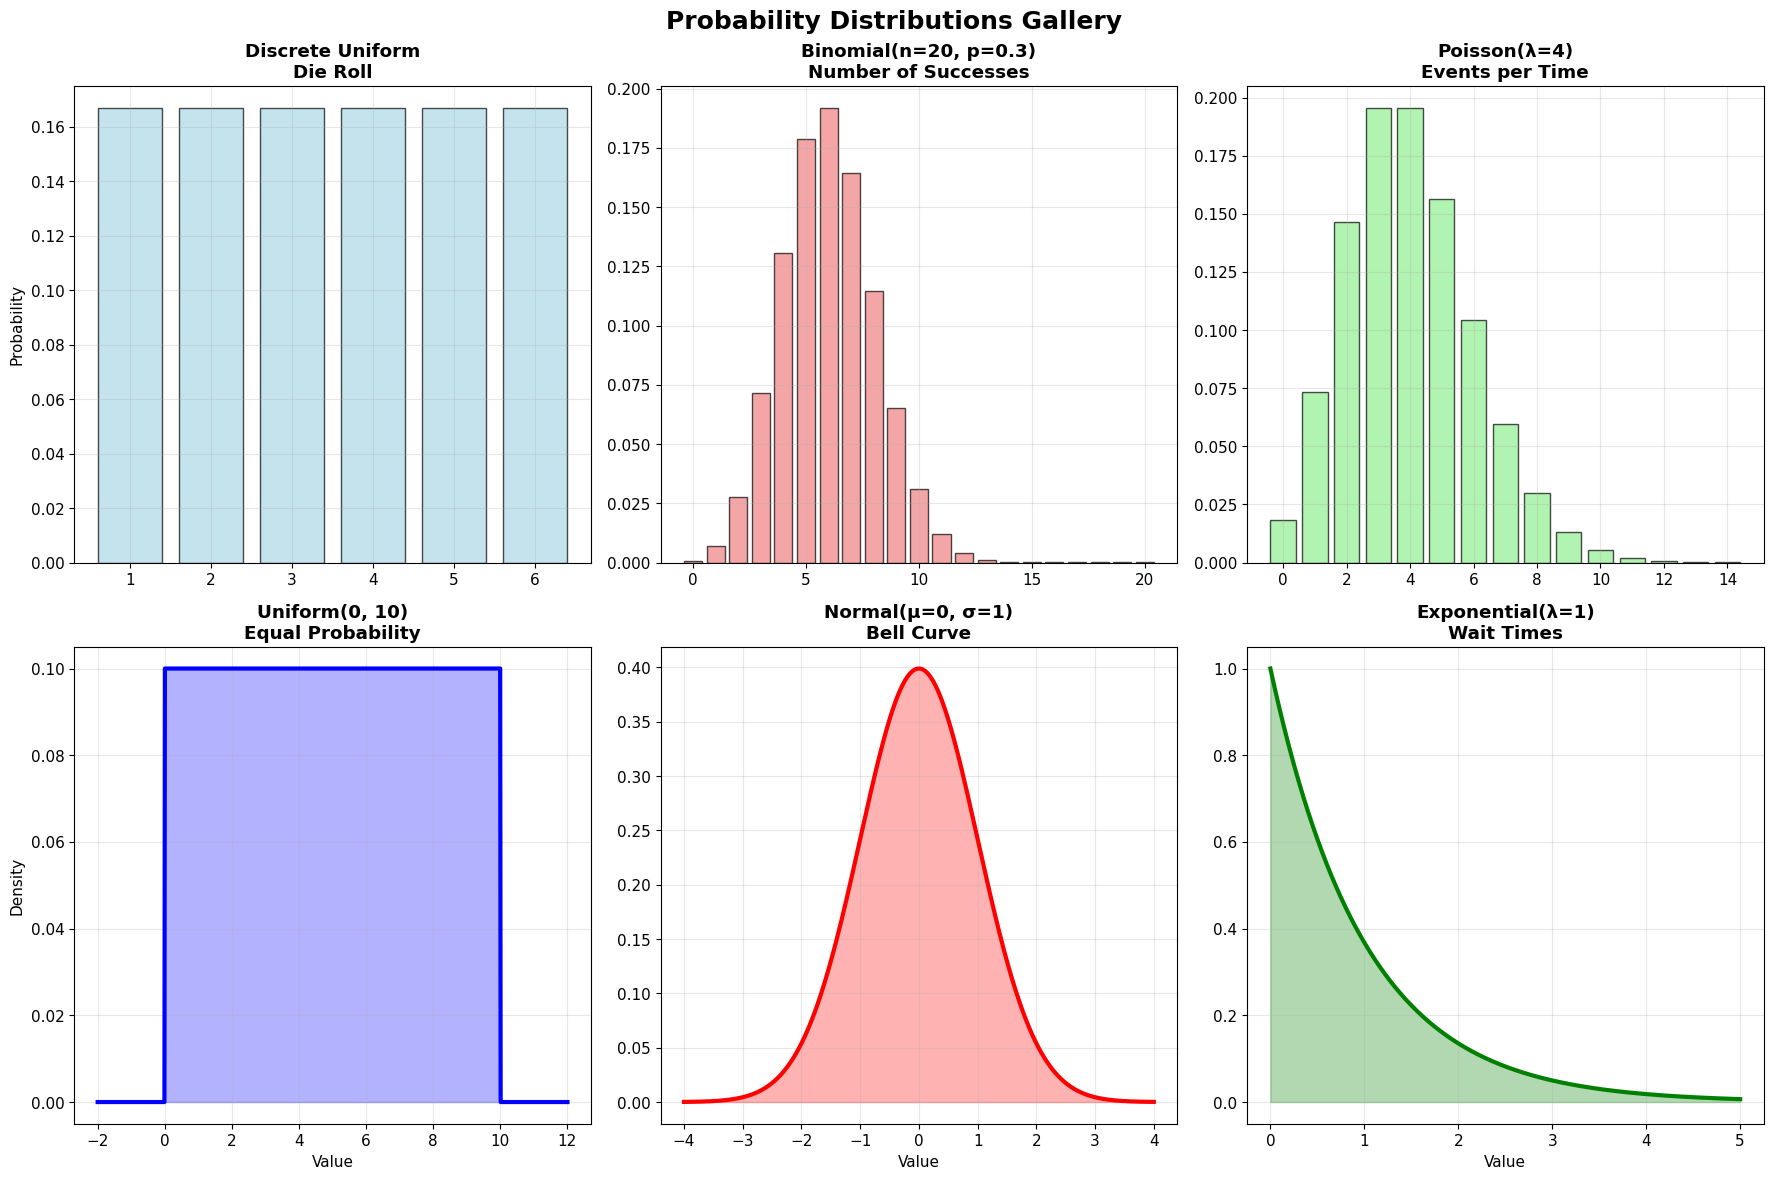

📊 DISTRIBUTION SUMMARY:
      Distribution       Type   Parameters         Support    Mean               Use Cases
  Discrete Uniform   Discrete a, b (range) [a, b] integers (a+b)/2 Games, Random Selection
          Binomial   Discrete         n, p          [0, n]      np          Success Counts
           Poisson   Discrete     λ (rate)          [0, ∞)       λ            Event Counts
         Geometric   Discrete            p          [1, ∞)     1/p        Wait for Success
Continuous Uniform Continuous a, b (range)          [a, b] (a+b)/2            Random Times
            Normal Continuous        μ, σ²         (-∞, ∞)       μ       Natural Phenomena
       Exponential Continuous     λ (rate)          [0, ∞)     1/λ              Wait Times

🎯 CHOOSING THE RIGHT DISTRIBUTION:

🔢 DISCRETE DATA (Countable values):
   • Equal probability for each outcome → Discrete Uniform
   • Fixed trials, count successes → Binomial
   • Events in fixed time/space → Poisson
   • Trials until first succ

In [6]:
# Create a comprehensive comparison of distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Probability Distributions Gallery', fontsize=18, fontweight='bold')

# 1. Discrete Uniform
x_unif = np.arange(1, 7)
y_unif = stats.randint.pmf(x_unif, 1, 7)
axes[0,0].bar(x_unif, y_unif, alpha=0.7, color='lightblue', edgecolor='black')
axes[0,0].set_title('Discrete Uniform\nDie Roll', fontweight='bold')
axes[0,0].set_ylabel('Probability')
axes[0,0].grid(True, alpha=0.3)

# 2. Binomial
n, p = 20, 0.3
x_binom = np.arange(0, n+1)
y_binom = stats.binom.pmf(x_binom, n, p)
axes[0,1].bar(x_binom, y_binom, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].set_title(f'Binomial(n={n}, p={p})\nNumber of Successes', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# 3. Poisson
lam = 4
x_poiss = np.arange(0, 15)
y_poiss = stats.poisson.pmf(x_poiss, lam)
axes[0,2].bar(x_poiss, y_poiss, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,2].set_title(f'Poisson(λ={lam})\nEvents per Time', fontweight='bold')
axes[0,2].grid(True, alpha=0.3)

# 4. Continuous Uniform
a, b = 0, 10
x_cunif = np.linspace(-2, 12, 1000)
y_cunif = stats.uniform.pdf(x_cunif, a, b-a)
axes[1,0].plot(x_cunif, y_cunif, 'blue', linewidth=3)
axes[1,0].fill_between(x_cunif, y_cunif, alpha=0.3, color='blue')
axes[1,0].set_title(f'Uniform({a}, {b})\nEqual Probability', fontweight='bold')
axes[1,0].set_ylabel('Density')
axes[1,0].set_xlabel('Value')
axes[1,0].grid(True, alpha=0.3)

# 5. Normal
mu, sigma = 0, 1
x_norm = np.linspace(-4, 4, 1000)
y_norm = stats.norm.pdf(x_norm, mu, sigma)
axes[1,1].plot(x_norm, y_norm, 'red', linewidth=3)
axes[1,1].fill_between(x_norm, y_norm, alpha=0.3, color='red')
axes[1,1].set_title(f'Normal(μ={mu}, σ={sigma})\nBell Curve', fontweight='bold')
axes[1,1].set_xlabel('Value')
axes[1,1].grid(True, alpha=0.3)

# 6. Exponential
lam_exp = 1
x_exp = np.linspace(0, 5, 1000)
y_exp = stats.expon.pdf(x_exp, scale=1/lam_exp)
axes[1,2].plot(x_exp, y_exp, 'green', linewidth=3)
axes[1,2].fill_between(x_exp, y_exp, alpha=0.3, color='green')
axes[1,2].set_title(f'Exponential(λ={lam_exp})\nWait Times', fontweight='bold')
axes[1,2].set_xlabel('Value')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 DISTRIBUTION SUMMARY:")
print("=" * 80)

# Create summary table
distribution_summary = {
    'Distribution': ['Discrete Uniform', 'Binomial', 'Poisson', 'Geometric',
                    'Continuous Uniform', 'Normal', 'Exponential'],
    'Type': ['Discrete', 'Discrete', 'Discrete', 'Discrete',
            'Continuous', 'Continuous', 'Continuous'],
    'Parameters': ['a, b (range)', 'n, p', 'λ (rate)', 'p',
                  'a, b (range)', 'μ, σ²', 'λ (rate)'],
    'Support': ['[a, b] integers', '[0, n]', '[0, ∞)', '[1, ∞)',
               '[a, b]', '(-∞, ∞)', '[0, ∞)'],
    'Mean': ['(a+b)/2', 'np', 'λ', '1/p',
            '(a+b)/2', 'μ', '1/λ'],
    'Use Cases': ['Games, Random Selection', 'Success Counts', 'Event Counts', 'Wait for Success',
                 'Random Times', 'Natural Phenomena', 'Wait Times']
}

summary_df = pd.DataFrame(distribution_summary)
print(summary_df.to_string(index=False))

print("\n" + "=" * 80)
print("🎯 CHOOSING THE RIGHT DISTRIBUTION:")
print("\n🔢 DISCRETE DATA (Countable values):")
print("   • Equal probability for each outcome → Discrete Uniform")
print("   • Fixed trials, count successes → Binomial")
print("   • Events in fixed time/space → Poisson")
print("   • Trials until first success → Geometric")

print("\n📈 CONTINUOUS DATA (Any value in range):")
print("   • Bounded with equal likelihood → Continuous Uniform")
print("   • Bell-shaped, symmetric → Normal")
print("   • Wait times, lifetime data → Exponential")

print("\n⚡ QUICK DECISION TREE:")
print("   1. Is your data discrete or continuous?")
print("   2. What is the support (possible values)?")
print("   3. What shape do you expect?")
print("   4. Do you have theoretical reasons for a specific distribution?")
print("   5. Does your situation match a common use case?")

print("\n🎓 NEXT STEPS FOR LEARNING:")
print("   📚 Study: Joint distributions, conditional distributions")
print("   🧮 Practice: Maximum likelihood estimation, method of moments")
print("   🔍 Explore: Hypothesis testing, confidence intervals")
print("   💻 Apply: Simulation, Monte Carlo methods")
print("   🌟 Advanced: Bayesian statistics, machine learning applications")

print("\n🎉 CONGRATULATIONS!")
print("You've completed a comprehensive tour of probability distributions!")
print("You now understand the foundations of statistical modeling and data generation.")